***for*** ***loop***

Case 1: Power Required – simple for-loop

In [ ]:
W = 103047      # Aircraft weight in Newtons
S = 47          # Wing area in m^2
AR = 6.5        # Aspect ratio
Cd0 = 0.032     # Zero-lift drag coefficient
e = 0.87        # Oswald efficiency factor
rho = 1.225    # Air density at sea level (kg/m^3)

# WHY k is used:
# → k represents induced drag factor
# → It depends on wing efficiency and aspect ratio
k = 1 / (3.14159 * e * AR)

# WHY list of velocities:
# → Aircraft does not fly at single speed
# → Power required varies with speed
V = [30, 40, 50, 60, 70, 80, 100]

for v in V:
    # WHY CL calculation:
    # → Lift must balance weight in level flight
    CL = W / (0.5 * rho * v**2 * S)

    # WHY Thrust Required:
    # → Thrust required equals drag in steady level flight
    TR = 0.5 * rho * v**2 * S * (Cd0 + k * CL**2)

    # WHY Power Required:
    # → Power is thrust multiplied by velocity
    PR = TR * v

    print(f"V={v} m/s | TR={TR:.2f} N | PR={PR:.2f} W")

V=30 m/s | TR=23898.79 N | PR=716963.69 W
V=40 m/s | TR=14450.63 N | PR=578025.27 W
V=50 m/s | TR=10608.10 N | PR=530404.77 W
V=60 m/s | TR=9083.75 N | PR=545024.85 W
V=70 m/s | TR=8751.17 N | PR=612582.15 W
V=80 m/s | TR=9139.86 N | PR=731188.63 W
V=100 m/s | TR=11288.27 N | PR=1128827.39 W


Case 2: Power Required – we use zip()

In [ ]:
W = 103047
S = 47
AR = 6.5
Cd0 = 0.032
e = 0.87

k = 1 / (3.14 * e * AR)

V = [100, 150, 200, 250, 300]        # Speeds
rho = [1.225, 1.112, 1.007, 0.909, 0.819]  # Densities at altitudes

for v, r in zip(V, rho):

    # WHY CL:
    # → Lift equilibrium condition at each altitude
    CL = W / (0.5 * r * v**2 * S)

    # WHY TR:
    # → Drag changes with both speed and density
    TR = 0.5 * r * v**2 * S * (Cd0 + k * CL**2)

    # WHY PR:
    # → Engine power needed at that altitude
    PR = TR * v

    print(f"V={v} m/s | rho={r} kg/m³ | PR={PR:.2f} W")


V=100 m/s | rho=1.225 kg/m³ | PR=1128932.52 W
V=150 m/s | rho=1.112 kg/m³ | PR=2974817.36 W
V=200 m/s | rho=1.007 kg/m³ | PR=6184463.71 W
V=250 m/s | rho=0.909 kg/m³ | PR=10792729.03 W
V=300 m/s | rho=0.819 kg/m³ | PR=16732546.35 W


Case 3: Power Required – we use index-based loop

In [ ]:
W = 103047
S = 47
AR = 6.5
Cd0 = 0.032
e = 0.87

k = 1 / (3.14 * e * AR)

V = [100, 150, 200, 250, 300]
rho = [1.225, 1.112, 1.007, 0.909, 0.819]

for i in range(len(V)):

    # WHY index i:
    # → Same index gives matching speed and density
    v = V[i]
    r = rho[i]

    CL = W / (0.5 * r * v**2 * S)
    TR = 0.5 * r * v**2 * S * (Cd0 + k * CL**2)
    PR = TR * v

    print(f"Case {i+1}: V={v} m/s | rho={r} | PR={PR:.2f} W")


Case 1: V=100 m/s | rho=1.225 | PR=1128932.52 W
Case 2: V=150 m/s | rho=1.112 | PR=2974817.36 W
Case 3: V=200 m/s | rho=1.007 | PR=6184463.71 W
Case 4: V=250 m/s | rho=0.909 | PR=10792729.03 W
Case 5: V=300 m/s | rho=0.819 | PR=16732546.35 W


***POWER REQUIRED (NUMPY ARRAY METHOD)***

Case 1: Single Density – Multiple Speeds (1D NumPy Array)

In [ ]:
import numpy as np
W = 103047      # Weight (N)
S = 47          # Wing area (m^2)
Cd0 = 0.032
AR = 6.5
e = 0.87

k = 1 / (np.pi * e * AR)

rho = 1.225                         # Single density
V = np.array([30, 40, 50, 60, 80])  # Multiple speeds

# Lift coefficient for all speeds at once
CL = W / (0.5 * rho * V**2 * S)

# Thrust Required (vectorized)
TR = 0.5 * rho * V**2 * S * (Cd0 + k * CL**2)

# Power Required
PR = TR * V

print("Case 1 → Power Required (W):")
print(PR)


Case 1 → Power Required (W):
[716963.10693826 578024.8302037  530404.42416296 545024.55346913
 731188.41510185]


Case 2: Pairwise Speed & Density (Same Length Arrays)

In [ ]:
import numpy as np
W = 103047
S = 47
Cd0 = 0.032
AR = 6.5
e = 0.87

k = 1 / (np.pi * e * AR)

rho = np.array([1.225, 1.112, 1.007])   # Densities
V   = np.array([60, 80, 100])           # Speeds

CL = W / (0.5 * rho * V**2 * S)
TR = 0.5 * rho * V**2 * S * (Cd0 + k * CL**2)
PR = TR * V

print("Case 2 → Power Required (W):")
print(PR)


Case 2 → Power Required (W):
[ 545024.55346913  714054.21362929 1009839.30764629]


Case 3: All Combinations (Broadcasting – Matrix Output)

In [ ]:
import numpy as np
W = 103047
S = 47
Cd0 = 0.032
AR = 6.5
e = 0.87

k = 1 / (np.pi * e * AR)

rho = np.array([1.225, 1.112, 1.007])  # 3 densities
V = np.array([60, 80, 100])            # 3 speeds

# Reshape density for broadcasting
CL = W / (0.5 * rho.reshape(3,1) * V**2 * S)
TR = 0.5 * rho.reshape(3,1) * V**2 * S * (Cd0 + k * CL**2)
PR = TR * V

print("Case 3 → Power Required Matrix (W):")
print(PR)


Case 3 → Power Required Matrix (W):
[[ 545024.55346913  731188.41510185 1128827.21208148]
 [ 561834.41817238  714054.21362929 1064950.02050343]
 [ 584527.87007715  703438.30255786 1009839.30764629]]


Case 4: NumPy Arrays with for-loop (Readable Output)

In [ ]:
import numpy as np
W = 103047
S = 47
Cd0 = 0.032
AR = 6.5
e = 0.87

k = 1 / (np.pi * e * AR)

rho = np.array([1.225, 1.112, 1.007])
V = np.array([60, 80, 100])

for r in rho:
    for v in V:
        CL = W / (0.5 * r * v**2 * S)
        TR = 0.5 * r * v**2 * S * (Cd0 + k * CL**2)
        PR = TR * v
        print(f"rho={r} kg/m³, V={v} m/s → PR={PR:.2f} W")


rho=1.225 kg/m³, V=60 m/s → PR=545024.55 W
rho=1.225 kg/m³, V=80 m/s → PR=731188.42 W
rho=1.225 kg/m³, V=100 m/s → PR=1128827.21 W
rho=1.112 kg/m³, V=60 m/s → PR=561834.42 W
rho=1.112 kg/m³, V=80 m/s → PR=714054.21 W
rho=1.112 kg/m³, V=100 m/s → PR=1064950.02 W
rho=1.007 kg/m³, V=60 m/s → PR=584527.87 W
rho=1.007 kg/m³, V=80 m/s → PR=703438.30 W
rho=1.007 kg/m³, V=100 m/s → PR=1009839.31 W


POWER REQUIRED USING *MATPLOTLIB*

Case 1: Simple Line Plot (PR vs V at Sea Level)

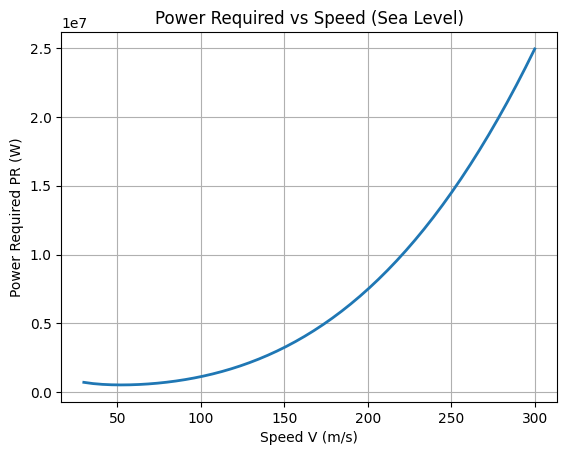

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
W = 103047
S = 47
AR = 6.5
Cd0 = 0.032
e = 0.87
rho = 1.225

k = 1 / (np.pi * e * AR)

V = np.linspace(30, 300, 50)

q = 0.5 * rho * V**2
CL = W / (q * S)
TR = q * S * (Cd0 + k * CL**2)
PR = TR * V

plt.figure()
plt.plot(V, PR, linewidth=2)
plt.xlabel("Speed V (m/s)")
plt.ylabel("Power Required PR (W)")
plt.title("Power Required vs Speed (Sea Level)")
plt.grid(True)
plt.show()


Case 2: Line + Scatter Plot (Same Data, Two Views)

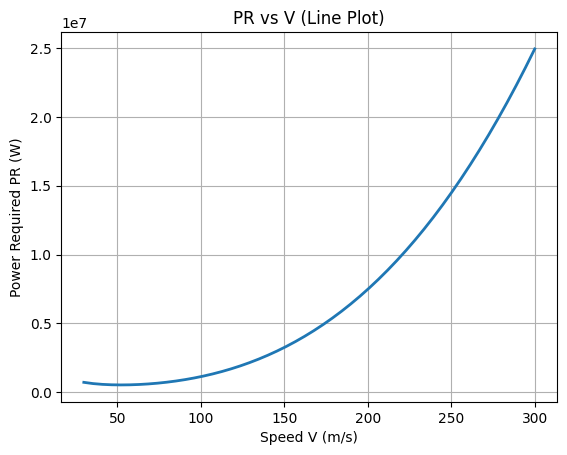

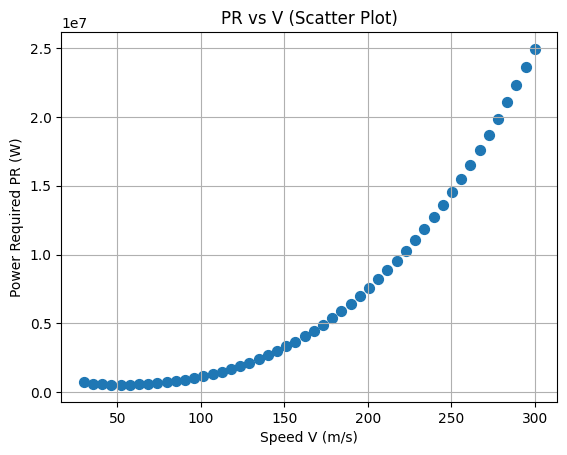

In [ ]:

plt.figure(1)
plt.plot(V, PR, linewidth=2)
plt.xlabel("Speed V (m/s)")
plt.ylabel("Power Required PR (W)")
plt.title("PR vs V (Line Plot)")
plt.grid(True)

plt.figure(2)
plt.scatter(V, PR, s=50)
plt.xlabel("Speed V (m/s)")
plt.ylabel("Power Required PR (W)")
plt.title("PR vs V (Scatter Plot)")
plt.grid(True)

plt.show()


Case 3: Subplots (Line + Scatter Side-by-Side)

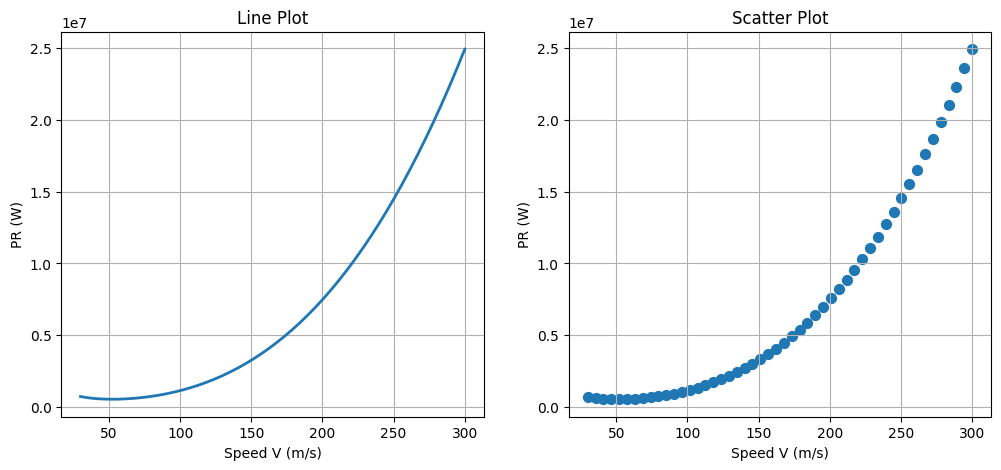

In [ ]:

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(V, PR, linewidth=2)
plt.xlabel("Speed V (m/s)")
plt.ylabel("PR (W)")
plt.title("Line Plot")
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(V, PR, s=50)
plt.xlabel("Speed V (m/s)")
plt.ylabel("PR (W)")
plt.title("Scatter Plot")
plt.grid(True)

plt.show()


Case 4: Overlay Plot for Two Densities

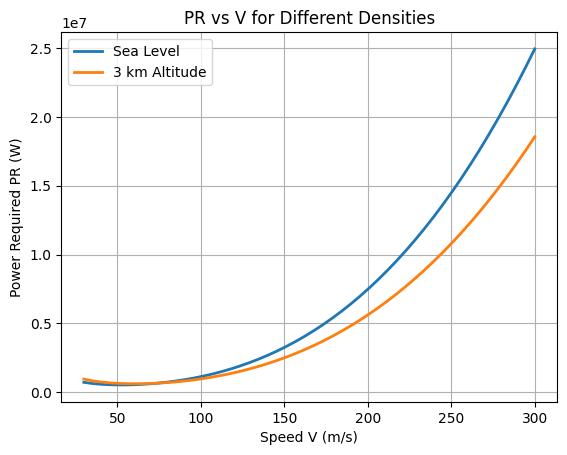

In [ ]:


rho1 = 1.225   # Sea level
rho2 = 0.909   # ~3 km altitude

for r, label in zip([rho1, rho2], ["Sea Level", "3 km Altitude"]):
    q = 0.5 * r * V**2
    CL = W / (q * S)
    TR = q * S * (Cd0 + k * CL**2)
    PR = TR * V
    plt.plot(V, PR, linewidth=2, label=label)

plt.xlabel("Speed V (m/s)")
plt.ylabel("Power Required PR (W)")
plt.title("PR vs V for Different Densities")
plt.grid(True)
plt.legend()
plt.show()


Case 5: Multiple Densities in a Loop

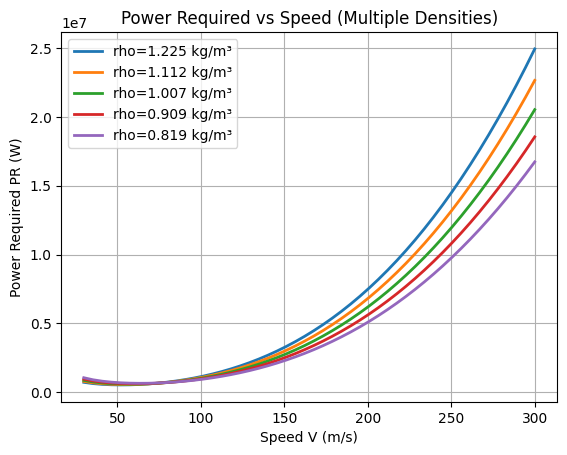

In [ ]:


rho_values = np.array([1.225, 1.112, 1.007, 0.909, 0.819])

plt.figure()

for r in rho_values:
    q = 0.5 * r * V**2
    CL = W / (q * S)
    TR = q * S * (Cd0 + k * CL**2)
    PR = TR * V
    plt.plot(V, PR, linewidth=2, label=f"rho={r} kg/m³")

plt.xlabel("Speed V (m/s)")
plt.ylabel("Power Required PR (W)")
plt.title("Power Required vs Speed (Multiple Densities)")
plt.grid(True)
plt.legend()
plt.show()


Case 6: Nested Loop (Vary Weight & Density)

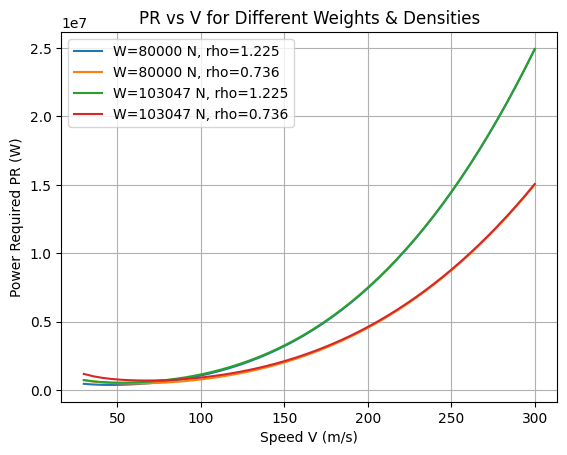

In [ ]:


Weight = np.array([80000, 103047])  # Light & heavy aircraft
rho_values = np.array([1.225, 0.736])  # Sea level & high altitude

plt.figure()

for W in Weight:
    for r in rho_values:
        q = 0.5 * r * V**2
        CL = W / (q * S)
        TR = q * S * (Cd0 + k * CL**2)
        PR = TR * V
        plt.plot(V, PR, label=f"W={W} N, rho={r}")

plt.xlabel("Speed V (m/s)")
plt.ylabel("Power Required PR (W)")
plt.title("PR vs V for Different Weights & Densities")
plt.grid(True)
plt.legend()
plt.show()
